In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
postprocessed_train = pd.read_parquet(f"../../data/preprocessed/v6-train.parquet")
postprocessed_test = pd.read_parquet(f"../../data/synthesized/v6-test.parquet")
postprocessed_train.head()

,doorcyclecounter,misalignment_cd_vs_ld,cmcouplerfriction,cmdoorfriction,cmelectronicage,cmvibration,doorforce,doorspeed,doorposition
0,1166,1.0,154.899994,121.300003,0.86,0.9,[],[],[]
1,1167,1.0,134.399994,120.699997,0.85,0.7,[],[],[]
2,1168,1.0,146.600006,119.800003,0.85,0.9,[],[],[]
3,1169,1.0,145.800003,122.000000,0.86,0.8,[],[],[]
4,1170,1.0,146.100006,120.400002,0.85,0.7,[],[],[]


In [9]:

# Extract the doorforce columns from the train DataFrame
train_doorforce_columns = [col for col in train.columns if col.startswith('doorforce_')]
train_data = np.array(train[train_doorforce_columns].values.tolist())

print(train_data)

[[ -75.09999847  -51.90000153  -48.         ... -140.
   -75.09999847  -75.09999847]
 [ -75.09999847  -92.09999847  -50.         ... -136.
   -75.09999847  -75.09999847]
 [ -75.09999847  -88.30000305  -50.20000076 ... -151.8999939
   -75.30000305  -75.09999847]
 ...
 [ -75.09999847  -93.5         -39.09999847 ... -132.30000305
   -75.09999847  -75.09999847]
 [ -75.09999847  -83.40000153  -47.20000076 ... -147.1000061
   -75.19999695  -75.09999847]
 [ -75.09999847  -74.59999847  -38.90000153 ...  -80.80000305
   -75.09999847  -75.09999847]]


In [10]:
#take all doorforce columns from sample and combine them into one array for each row
doorforce_columns = [col for col in sample.columns if col.startswith('doorforce_')]
test_doorforce = np.array(sample[doorforce_columns].values.tolist())

print(test_doorforce)


[[ -74.15507507  -84.66925812  -56.80304718 ... -142.62614441
   -75.60641479  -74.93983459]
 [ 107.90601349  -47.03252411   18.57973289 ... -112.62883759
   -75.55708313  -74.33857727]
 [ -74.27639771  -60.00640869  -38.99791336 ... -159.91436768
   -75.64567566  -74.22819519]
 ...
 [ -74.96188354  -47.93074799  -51.25482941 ... -172.92874146
   -76.33151245  -75.58544922]
 [-105.36089325  -97.30879974  -43.48709869 ... -125.0226059
   -76.24359894  -74.44435883]
 [ -74.36830139  -85.83761597  -41.87205887 ...  -87.01631927
   -75.94378662  -75.44552612]]


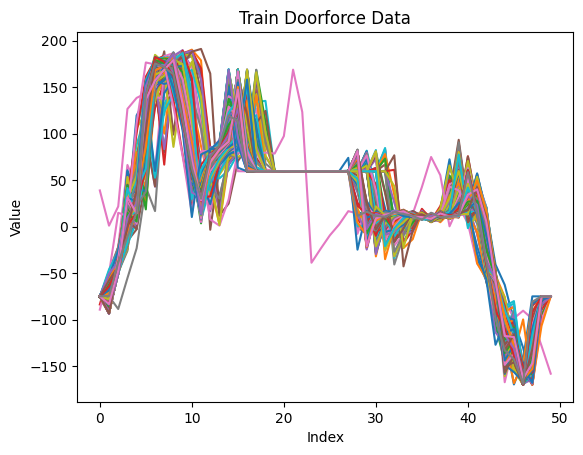

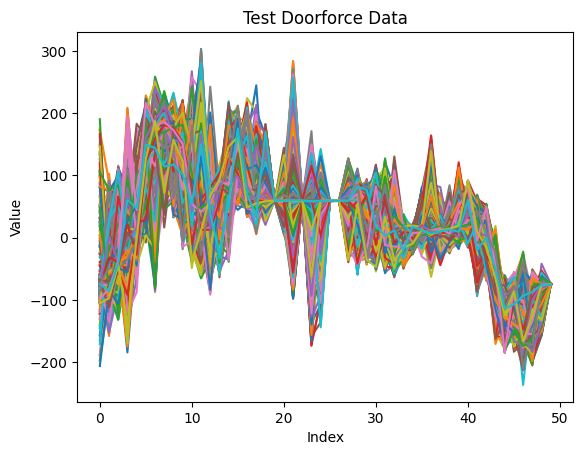

In [11]:
for row_values in train_data:
    plt.plot(row_values)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Train Doorforce Data')
plt.show()

for row_values in test_doorforce:
    plt.plot(row_values)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Test Doorforce Data')
plt.show()

KeyError: 'y'

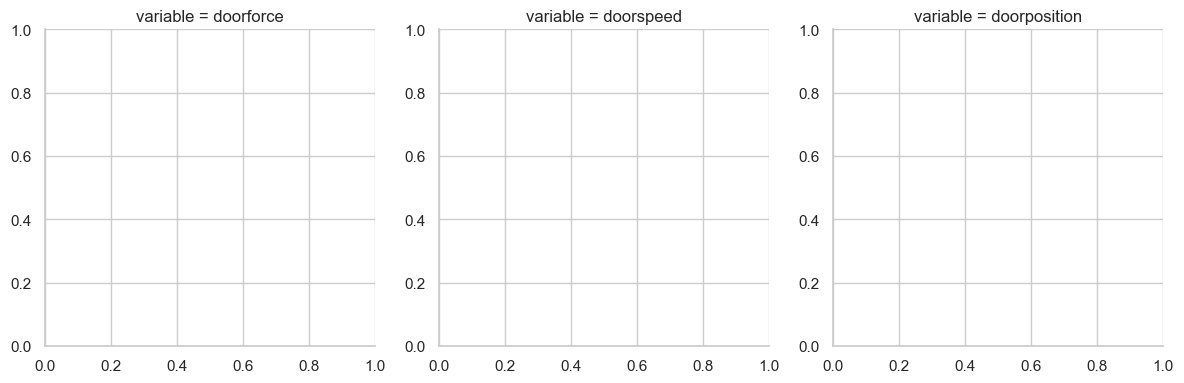

In [17]:
def prepare_data_for_plotting(df, data_type):
    """
    Prepare the dataframe for plotting by melting the time series columns.

    Parameters:
    df (pd.DataFrame): The input dataframe with time-state columns.
    data_type (str): A string indicating whether the data is 'real' or 'synthetic'.

    Returns:
    pd.DataFrame: The melted dataframe ready for plotting.
    """
    # Ensure we're working with a copy of the dataframe
    df = df.copy()
    
    # Add a column to indicate the data type (real or synthetic)
    df.loc[:, 'data_type'] = data_type

    # Melt the dataframe to long format
    melted_df = df.melt(id_vars=['doorcyclecounter', 'data_type'], 
                        value_vars=['doorforce', 'doorspeed', 'doorposition'],
                        var_name='variable', 
                        value_name='value')

    # Expand the arrays in the 'value' column
    exploded_df = melted_df.explode('value').reset_index(drop=True)

    # Add a time index based on the length of the arrays
    exploded_df['time'] = exploded_df.groupby(['doorcyclecounter', 'variable']).cumcount()

    return exploded_df

def sample_data(df, num_samples=1):
    """
    Sample a specified number of rows with different doorcyclecounter values from the dataframe.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    num_samples (int): The number of samples to select.

    Returns:
    pd.DataFrame: The sampled dataframe.
    """
    unique_counters = df['doorcyclecounter'].unique()
    sampled_counters = np.random.choice(unique_counters, num_samples, replace=False)
    sampled_df = df[df['doorcyclecounter'].isin(sampled_counters)]
    return sampled_df

# Example usage
# Assuming 'real_df' and 'synthetic_df' are the real and synthetic dataframes processed as described
# real_df = combine_time_state_columns(real_df)
# synthetic_df = combine_time_state_columns(synthetic_df)

# Sample 5 rows from each dataframe
real_sampled = sample_data(postprocessed_train, num_samples=1)
synthetic_sampled = sample_data(postprocessed_test, num_samples=1)

# Prepare data for plotting
real_data = prepare_data_for_plotting(real_sampled, 'real')
synthetic_data = prepare_data_for_plotting(synthetic_sampled, 'synthetic')

# Combine real and synthetic data
combined_data = pd.concat([real_data, synthetic_data])

# Plot the data
plot = sns.relplot(
    x='time',
    y='value',
    hue='data_type',
    col='variable',
    height=4,
    kind='line',
    palette=sns.color_palette(n_colors=2),
    data=combined_data,
    facet_kws=dict(sharey=False, sharex=True),
)

# Show the plot
plt.show()


C:\Users\waqas\AppData\Local\Temp\ipykernel_14544\3174050863.py:19: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  plot = sns.relplot(


ValueError: The following variable cannot be assigned with wide-form data: `hue`

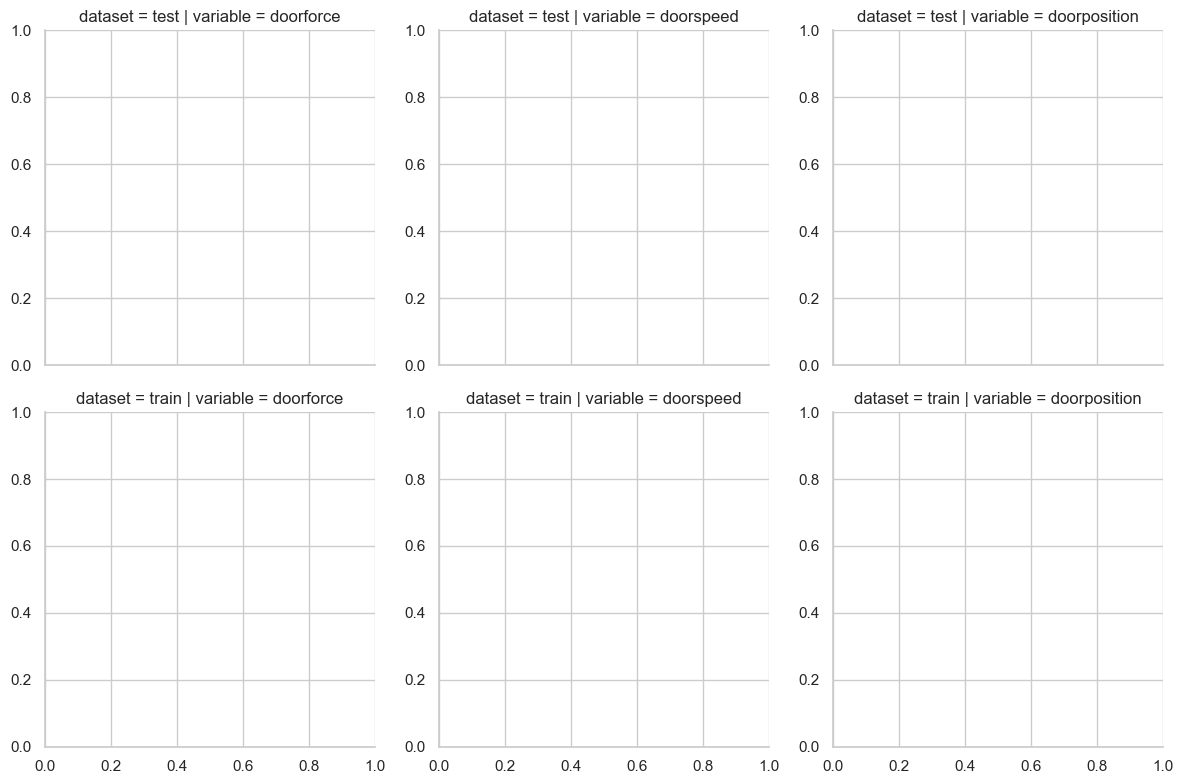

In [18]:
# Select 5 random rows from each DataFrame
random_rows_test = postprocessed_test.sample(n=5, random_state=1)
random_rows_train = postprocessed_train.sample(n=5, random_state=1)

# Create a long-form DataFrame for plotting
def create_long_form(df, label):
    df_long = df[['doorcyclecounter', 'doorforce', 'doorspeed', 'doorposition']].melt(id_vars=['doorcyclecounter'], var_name='variable', value_name='value')
    df_long['time'] = df_long.apply(lambda row: list(range(len(row['value']))), axis=1)
    df_long = df_long.explode(['value', 'time']).reset_index(drop=True)
    df_long['dataset'] = label
    return df_long

long_test = create_long_form(random_rows_test, 'test')
long_train = create_long_form(random_rows_train, 'train')
combined_long = pd.concat([long_test, long_train])

# Plot using seaborn
sns.set(style="whitegrid")
plot = sns.relplot(
    data=combined_long,
    x='time',
    y='value',
    hue='doorcyclecounter',
    col='variable',
    row='dataset',
    kind='line',
    height=4,
    facet_kws=dict(sharey=False, sharex=True),
    palette=sns.color_palette(n_colors=5)
)

plot.fig.suptitle('Comparison of doorforce, doorspeed, and doorposition between Real and Synthetic data for failure type 1', y=1.02)
plt.show()

KeyError: 'y'

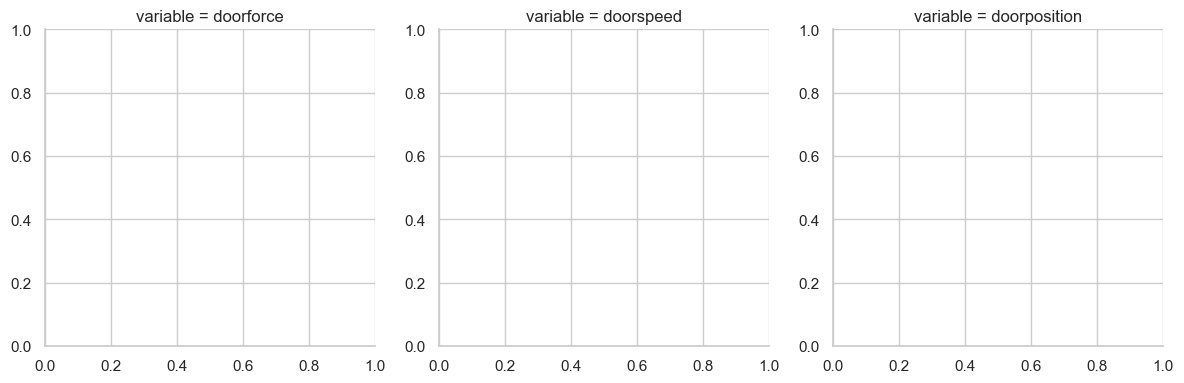

In [20]:
def prepare_data_for_plotting(df, data_type):
    """
    Prepare the dataframe for plotting by melting the time series columns.

    Parameters:
    df (pd.DataFrame): The input dataframe with time-state columns.
    data_type (str): A string indicating whether the data is 'real' or 'synthetic'.

    Returns:
    pd.DataFrame: The melted dataframe ready for plotting.
    """
    # Ensure we're working with a copy of the dataframe
    df = df.copy()
    
    # Add a column to indicate the data type (real or synthetic)
    df.loc[:, 'data_type'] = data_type

    # Melt the dataframe to long format
    melted_df = df.melt(id_vars=['doorcyclecounter', 'data_type'], 
                        value_vars=['doorforce', 'doorspeed', 'doorposition'],
                        var_name='variable', 
                        value_name='value')

    # Expand the arrays in the 'value' column
    exploded_df = melted_df.explode('value').reset_index(drop=True)

    # Add a time index based on the length of the arrays
    exploded_df['time'] = exploded_df.groupby(['doorcyclecounter', 'variable']).cumcount()

    return exploded_df

def sample_data(df, num_samples=5):
    """
    Sample a specified number of rows with different doorcyclecounter values from the dataframe.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    num_samples (int): The number of samples to select.

    Returns:
    pd.DataFrame: The sampled dataframe.
    """
    unique_counters = df['doorcyclecounter'].unique()
    sampled_counters = np.random.choice(unique_counters, num_samples, replace=False)
    sampled_df = df[df['doorcyclecounter'].isin(sampled_counters)]
    return sampled_df

# Example usage
# Assuming 'real_df' and 'synthetic_df' are the real and synthetic dataframes processed as described
# real_df = combine_time_state_columns(real_df)
# synthetic_df = combine_time_state_columns(synthetic_df)

# Sample 5 rows from each dataframe
real_sampled = sample_data(postprocessed_train, num_samples=5)
synthetic_sampled = sample_data(postprocessed_test, num_samples=5)

# Prepare data for plotting
real_data = prepare_data_for_plotting(real_sampled, 'real')
synthetic_data = prepare_data_for_plotting(synthetic_sampled, 'synthetic')

# Combine real and synthetic data
combined_data = pd.concat([real_data, synthetic_data])

# Plot the data
plot = sns.relplot(
    x='time',
    y='value',
    hue='data_type',
    col='variable',
    height=4,
    kind='line',
    palette=sns.color_palette(n_colors=2),
    data=combined_data,
    facet_kws=dict(sharey=False, sharex=True),
)

# Show the plot
plt.show()